In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
num_paths = 10240
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
config = get_config()

In [3]:
def get_drift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDims/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [4]:
true_files, local_files, bws = get_drift_files(config=config, root_dir=root_dir)
local_files

['/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDims/IIDNadaraya_fBiPot_8DDims_DriftTrack_0000282bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDims/IIDNadaraya_fBiPot_8DDims_DriftTrack_0000372bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDims/IIDNadaraya_fBiPot_8DDims_DriftTrack_0000491bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDims/IIDNadaraya_fBiPot_8DDims_DriftTrack_0000649bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_59390/160764616.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_59390/160764616.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


9.482101810783064 2.82e-05 inf
9.482152962464578 3.72e-05 inf


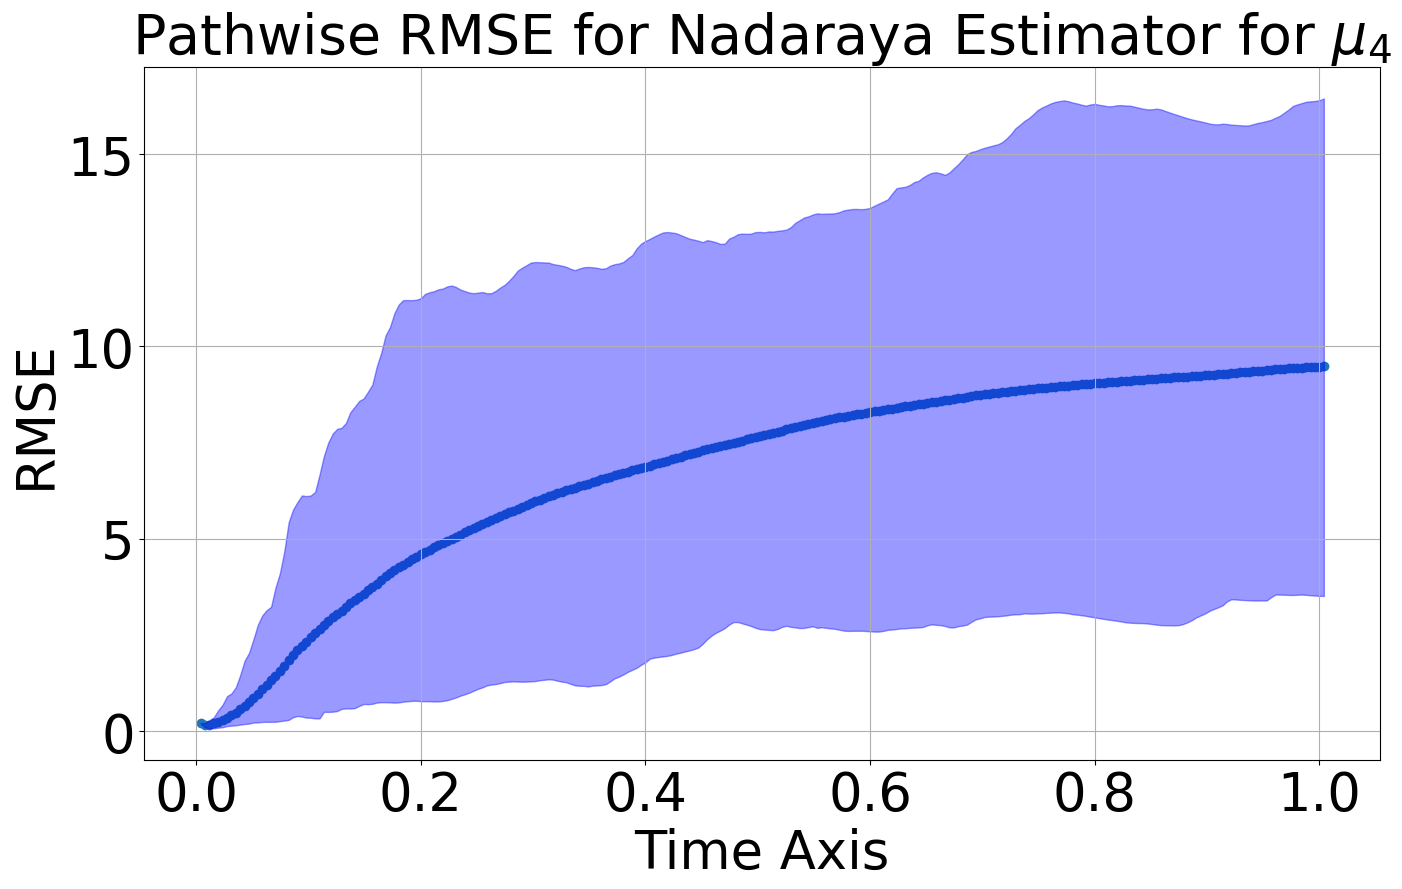

Final time cumulative MSE local-time error 9.482152962464578 with IQR ((3.51807193213694, 16.444632179139603))at bw 3.72e-05

9.482544041815874 4.91e-05 9.482152962464578
9.483115284653381 6.49e-05 9.482152962464578
9.483175532834274 8.57e-05 9.482152962464578
9.482471149853646 0.0001493 9.482152962464578
9.482361223934374 0.0001972 9.482152962464578
9.48243568586054 0.0002603 9.482152962464578
9.482572799970956 0.0003437 9.482152962464578
9.482713784304032 0.0004538 9.482152962464578
9.482812502574417 0.0005992 9.482152962464578
9.484858368337225 0.0007912 9.482152962464578
9.484761143384649 0.0010446 9.482152962464578
9.489304509799863 0.0013793 9.482152962464578
9.291293611018805 0.0018211 9.482152962464578


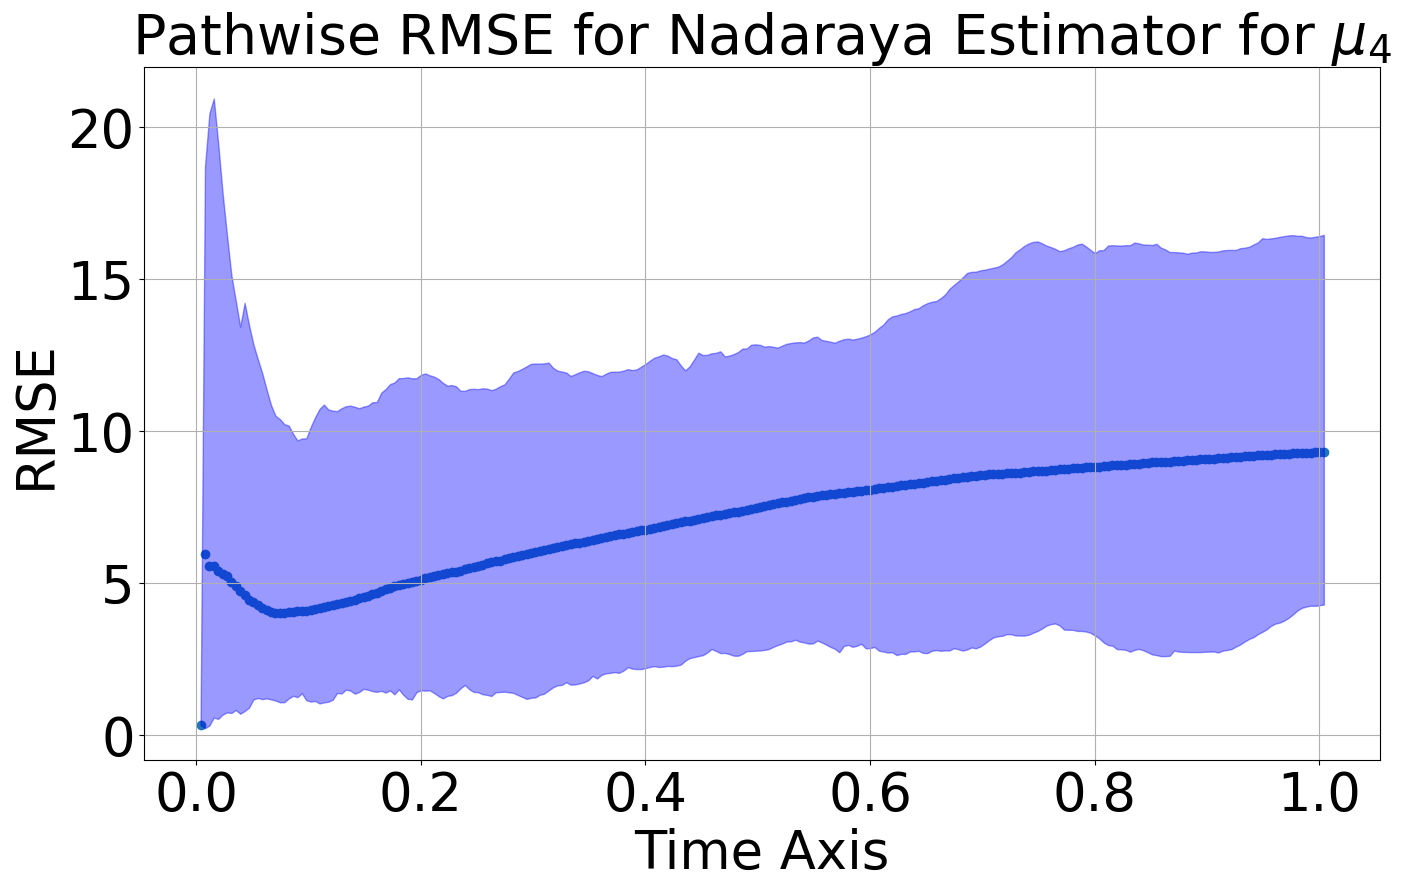

Final time cumulative MSE local-time error 9.291293611018805 with IQR ((4.278445264871734, 16.443699950938786))at bw 0.0018211

9.49900892266051 0.0018211 9.291293611018805
9.265200830774956 0.0024046 9.291293611018805


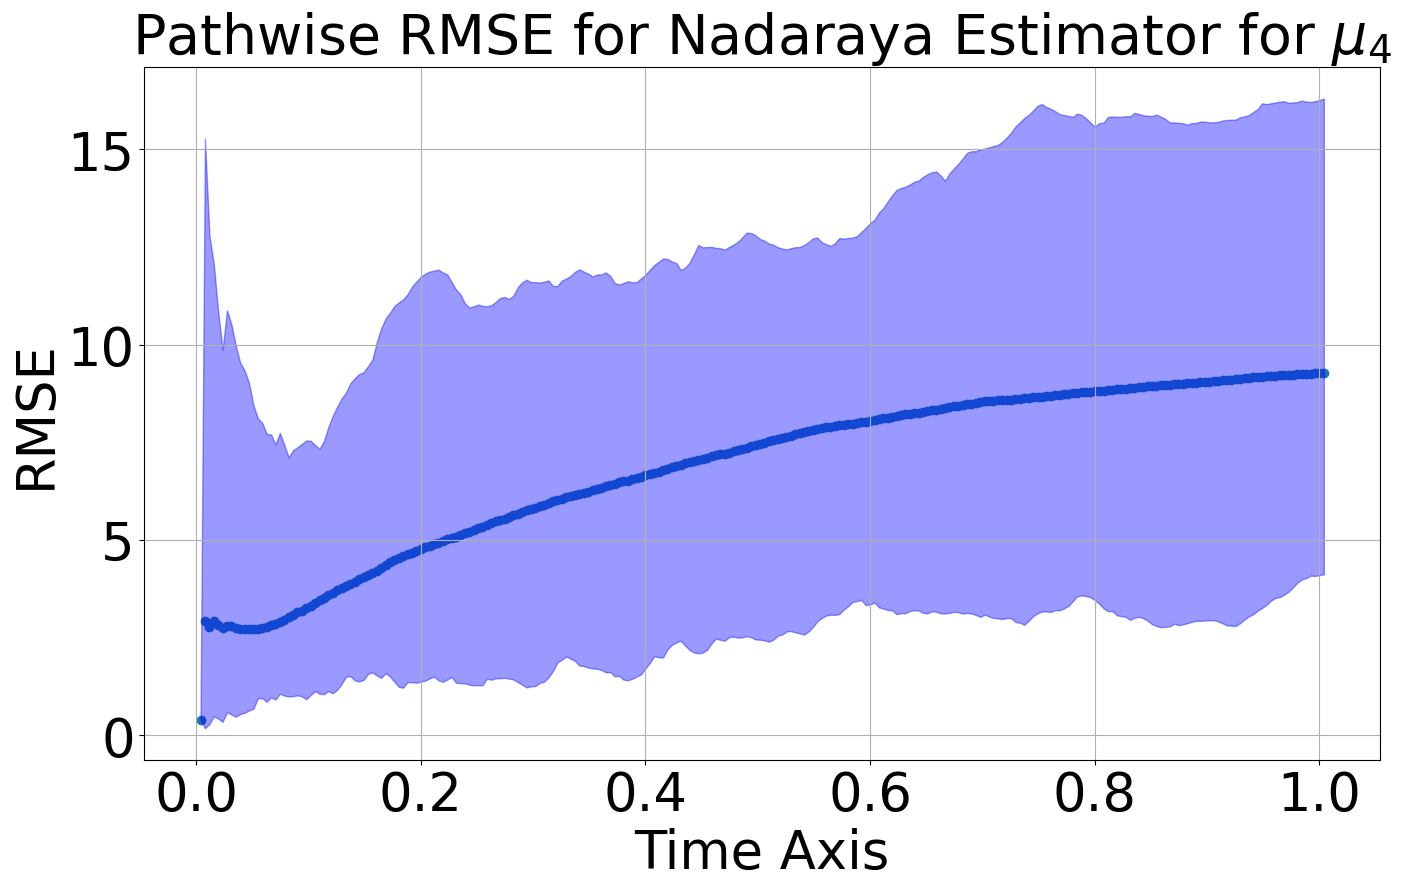

Final time cumulative MSE local-time error 9.265200830774956 with IQR ((4.113252158790532, 16.30116423520202))at bw 0.0024046

9.592137141267282 0.0024046 9.265200830774956
9.260879910306437 0.0031749 9.265200830774956


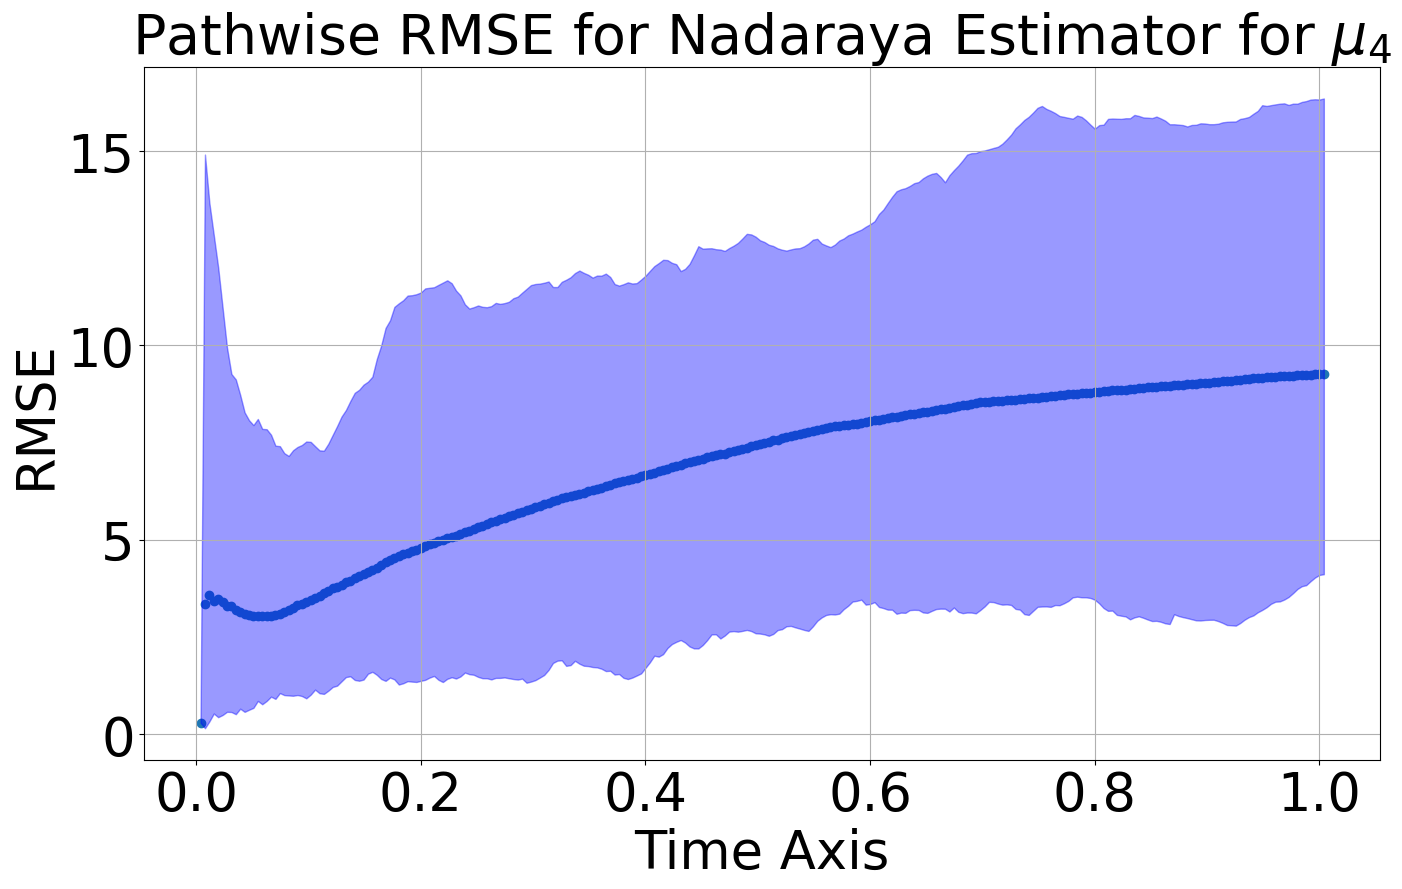

Final time cumulative MSE local-time error 9.260879910306437 with IQR ((4.115748049715861, 16.351888105009987))at bw 0.0031749

9.701792204955783 0.0031749 9.260879910306437
9.781433781881077 0.0041919 9.260879910306437
9.288600372147506 0.0041919 9.260879910306437
9.499778943992352 0.0055348 9.260879910306437
9.610956091000423 0.0055348 9.260879910306437
9.747427347664665 0.0073079 9.260879910306437
9.256125376682828 0.0073079 9.260879910306437


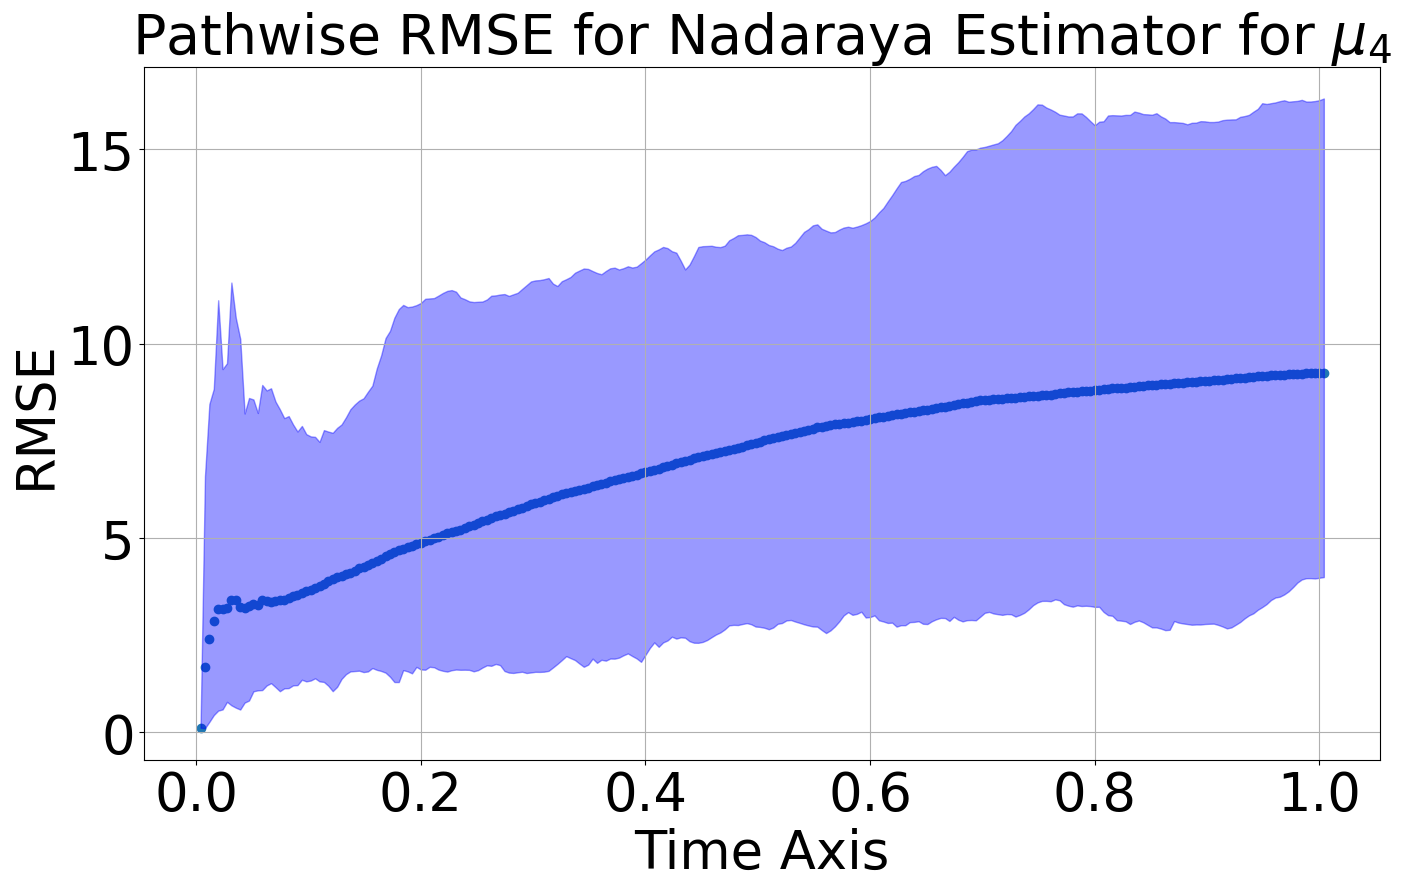

Final time cumulative MSE local-time error 9.256125376682828 with IQR ((3.9968793759925267, 16.309900582406282))at bw 0.0073079

9.24680180827087 0.009649 9.256125376682828


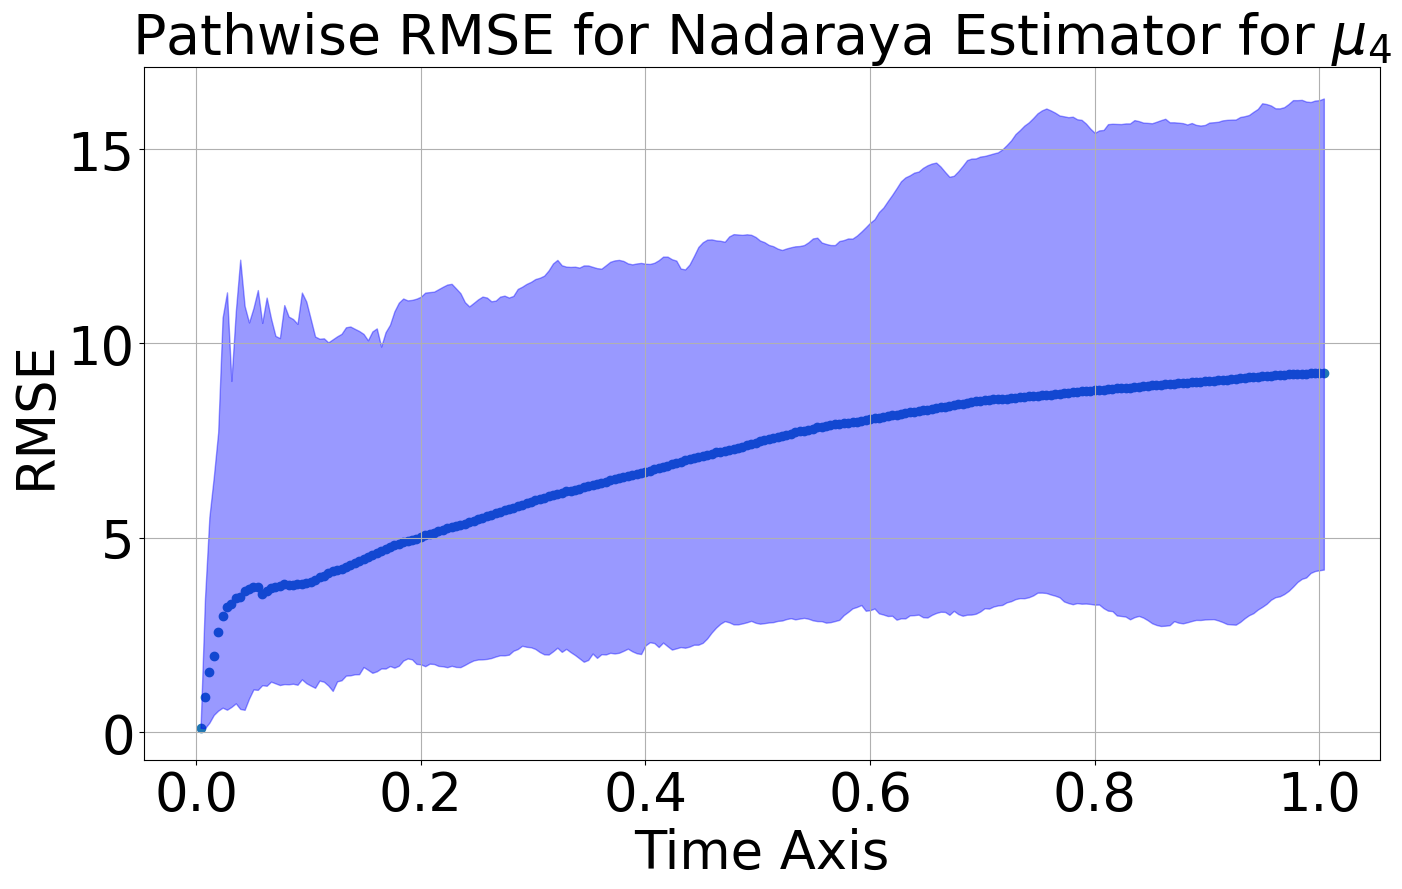

Final time cumulative MSE local-time error 9.24680180827087 with IQR ((4.181385802573037, 16.30265511019513))at bw 0.009649

9.7158601811386 0.009649 9.24680180827087
9.243508443300469 0.0127401 9.24680180827087


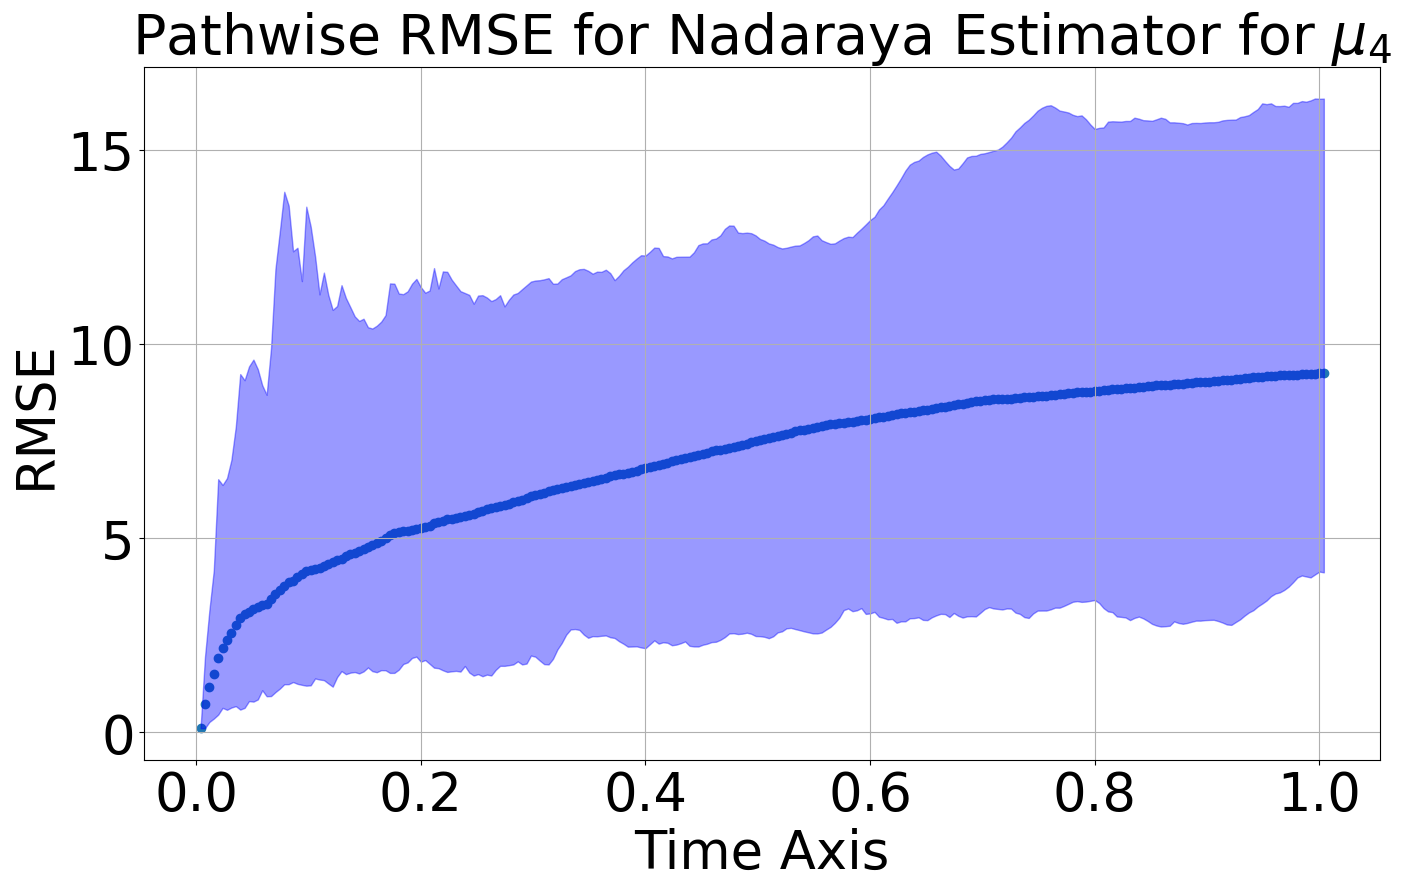

Final time cumulative MSE local-time error 9.243508443300469 with IQR ((4.115321311865099, 16.32047177589927))at bw 0.0127401

9.537476631447484 0.0127401 9.243508443300469
9.528266514041636 0.0168214 9.243508443300469
9.495362681138467 0.0222102 9.243508443300469
9.526070990314201 0.0293252 9.243508443300469
9.472446001633124 0.0387196 9.243508443300469


In [5]:
curr_rmse = np.inf
toSave = True
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if i == 1: continue
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_4$",fontsize=40)
            ax.set_ylabel("RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/8DDims/IIDNadaraya_fBiPot_{config.ndims}DDims_DriftTrack_{round(bw, 6)}bw_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw}\n")

In [6]:
def get_evalexpdrift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDims/"
    driftevalexp_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and "EvalExp" in file:
            driftevalexp_files.append(root_nadaraya_dir+file)
    assert len(driftevalexp_files)>0, "No evalexp found"
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    driftevalexp_files = sorted(driftevalexp_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in driftevalexp_files]
    return driftevalexp_files, bws

In [7]:
eval_exp_files, bws = get_evalexpdrift_files(config=config, root_dir=root_dir)

In [8]:
def plot_drift_estimator(mean, mean_min, mean_max, numpy_Xs, true_drift, bw,  toSave: bool = False):
    fig, axes = plt.subplots(4, 2, figsize=(20, 24))
    axes = axes.flatten()  # Flatten to easily index with a single loop
    for d in range(mean.shape[-1]):
        axes[d].scatter(numpy_Xs[:, d], true_drift[:, d], color="red", label="True Drift")
        ymin = mean[:, d] - mean_min[:, d]
        ymax = mean_max[:, d] - mean[:, d]
        ymin[ymin < 0.] = 0.
        ymax[ymax < 0.] = 0.
        axes[d].errorbar(numpy_Xs[:, d], mean[:, d], yerr=[ymin, ymax], xerr=None, fmt='o', color="blue", alpha=0.4)
        axes[d].errorbar(numpy_Xs[:, d], mean[:, d], label="Estimated Drift", color="blue")
        axes[d].set_title(rf"Nadaraya Estimator for $\mu_4$", fontsize=22)
        axes[d].tick_params(labelsize=13)
        axes[d].set_xlabel(f"State $Y$ at Dimension {d+1}", fontsize=20)
        axes[d].set_ylabel("Drift Value", fontsize=20)
        axes[d].legend(fontsize=14)
    plt.tight_layout()
    if toSave:
        plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/8DDims/IIDNadaraya_fBiPot_{config.ndims}DDims_DriftEvalExp_{round(bw, 6)}bw").replace(".", "")+".png")
        plt.show()
        plt.close()
        print(f"Final time domain MSE local-time error {total_local_errors[-1]}  at bw {bw}\n")
    plt.show()
    plt.close()

In [9]:
raise RuntimeError
curr_mse = np.inf
toSave = True
Xshape = config.ts_length
bw_idx = 0
Xs = np.concatenate([np.linspace(-4.9, 4.9, num=Xshape).reshape(-1, 1), np.linspace(-4.4, 4.4, num=Xshape).reshape(-1,1), \
                                     np.linspace(-4.05, 4.05, num=Xshape).reshape(-1,1), np.linspace(-3.9, 3.9, num=Xshape).reshape(-1,1), \
                                     np.linspace(-3.7, 3.7, num=Xshape).reshape(-1,1), np.linspace(-3.6, 3.6, num=Xshape).reshape(-1,1), \
                                     np.linspace(-3.5, 3.5, num=Xshape).reshape(-1,1), np.linspace(-3.4, 3.4, num=Xshape).reshape(-1,1)],
                                    axis=1)
is_true_drift = -(4. * np.array(config.quartic_coeff) * np.power(Xs,3) + 2. * np.array(
        config.quad_coeff) * Xs + np.array(config.const))
is_true_drift = is_true_drift/(1.+config.deltaT*np.abs(is_true_drift))
print(is_true_drift.shape)
for file in zip(*[eval_exp_files, bws]):
    bw = file[-1]
    print(bw)
    try:
        f = np.load(file[0])
        print(f.shape)
        is_drift = f.mean(axis=1)
        mse = np.nanmean(np.sum((is_true_drift-is_drift)**2, axis=-1))
        if mse < curr_mse:
            curr_mse = mse
            mu_hats_minq = np.quantile(f, q=0.005, axis=1) # Lower bound
            mu_hats_maxq = np.quantile(f, q=0.995, axis=1) # uPPER bound
            plot_drift_estimator(mean=is_drift, mean_min=mu_hats_minq, mean_max=mu_hats_maxq, numpy_Xs=Xs, true_drift=is_true_drift, bw=bw)
            print(f"MSE {mse} with BW {bw} at BWIDX {bw_idx}\n")
        bw_idx += 1
    except FileNotFoundError as e:
        continue

RuntimeError: 

In [ ]:
np.logspace(-3.5, -0.05, 30)[18]